# Phishing

## Análisis Exploratorio de la Información

In [1]:
import sys

In [2]:
file_path = "Phishing_Email.csv"

In [3]:
import pandas as pd

In [4]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

In [5]:
dataset = pd.read_csv(file_path)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
dataset.shape

(18650, 3)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [9]:
dataset.head(2)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to "" sons "" being "" treated like senior relatives "" . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not completely impossible ) . alexis mr",Safe Email
1,1,"the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >",Safe Email


In [10]:
dataset.tail(2)

,Unnamed: 0,Email Text,Email Type
18648,18649,"press clippings - letter on californian utilities please find attached the following article : ' californian utilities ' - financial times ( also sent to california distribution team ) kind regards , kuldeep chana",Safe Email
18649,18650,empty,Phishing Email


In [11]:
dataset.sample(2) 

,Unnamed: 0,Email Text,Email Type
2490,2490,"don ' t buy viia - gra so try our revolutionary product , ciiallis soft tabs . new improved formula makes it even better . cialis soft tabs is the new impotence treatment drug that everyone is talking about . cialis acts up to 36 hours , compare this to only two or three hours of viagra action ! the active ingredient is tadalafil , same as in brand cialis . simply dissolve half a pill under your tongue , 10 min before intercourse for the best erections you ' ve ever had ! cialis also have less sidebacks ( you can drive or mix alcohol drinks with them ) . no prior prescription is needed . worldwide shipping , thousands of happy customers ! you can get it at : http : / / partied . net / cs / ? ronn world rx direct can bring you quality generic drugs for a fraction of the cost of the expensive brand name equivalents . order our tadalafil pills today and save 80 % . we ship worldwide , and currently supply to over 1 million customers globally ! we always strive to bring you the cheapest prices . out of maiilling : http : / / partied . net / rm . php ? ronn apcg",Phishing Email
11308,11309,"http://www.hughes-family.org/bugzilla/show_bug.cgi?id=739spamassassin-contrib@msquadrat.de changed: What |Removed |Added\n----------------------------------------------------------------------------\n Status|NEW |RESOLVED\n Resolution| |WONTFIX------- Additional Comments From spamassassin-contrib@msquadrat.de 2002-10-03 14:17 -------\nRelieving Dan ;-) ------- You are receiving this mail because: -------\nYou are the assignee for the bug, or are watching the assignee.\n-------------------------------------------------------\nThis sf.net email is sponsored by:ThinkGeek\nWelcome to geek heaven.\nhttp://thinkgeek.com/sf\n_______________________________________________\nSpamassassin-devel mailing list\nSpamassassin-devel@lists.sourceforge.net\nhttps://lists.sourceforge.net/lists/listinfo/spamassassin-devel\n",Safe Email


In [12]:
dataset.dtypes

Unnamed: 0     int64
Email Text    object
Email Type    object
dtype: object

In [13]:
unique_values = dataset.nunique()
print("Unique values in each column:")
print(unique_values)

Unique values in each column:
Unnamed: 0    18650
Email Text    17537
Email Type        2
dtype: int64


In [14]:
dataset['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [15]:
dataset.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

## Preprocesamiento

### Limpieza de Datos y Feature Engineering

In [16]:
dataset = dataset.dropna()

In [17]:
dataset.shape

(18634, 3)

In [19]:
import nltk

Reemplazar palabras por su abreviacion o sinomimo

In [20]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmer = WordNetLemmatizer()
def lematize(text):
    return ' '.join([lemmer.lemmatize(w) for w in text.split()])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Remove unicode y puntuations

In [21]:
import re
def remove_characters(text):
    t =  re.sub(r'[^\x00-\x7F]+',' ', text)
    t = re.sub(r'[^\w\s]', '', t)
    return t


Limpiar texto del email utilizando los metodos de arriba

In [22]:
df = dataset.copy()

df['Cleaned'] = dataset['Email Text'].apply(lematize)
df = df[df['Cleaned'].str.strip() != '']
df = df.dropna(subset=['Cleaned'])


In [18]:
dataset['Email Type'] = dataset['Email Type'].replace({
    'Safe Email': 0,
    'Phishing Email': 1
})


In [23]:
df.to_csv('Phishing_Email_Cleaned.csv', index=False)

In [24]:
df = pd.read_csv("Phishing_Email_Cleaned.csv")

Debido a limitaciones memoria, reducimos el dataset a utilizar en el entrenamiento.

In [25]:
N = 5000

data_r = df.groupby('Email Type').sample(n=N, random_state=786)

data_r['Email Type'].value_counts()

Email Type
0    5000
1    5000
Name: count, dtype: int64

In [26]:
data_r.to_csv("Phishing_Email_Reduced.csv", index=False)

In [27]:
df = pd.read_csv("Phishing_Email_Reduced.csv")

Separaramos el dataset para entrenamiento y validación.

In [28]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)

data = data.reset_index(drop=True)
data_unseen = data_unseen.reset_index(drop=True)


In [29]:
data.to_csv("Phishing_Email_Train.csv", index=False)
data_unseen.to_csv("Phishing_Email_Unseen.csv", index=False)

In [30]:
data = pd.read_csv("Phishing_Email_Train.csv")
data_unseen = pd.read_csv("Phishing_Email_Unseen.csv")

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Preparamos los datos para el entrenamiento.

In [32]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned'])
y = data['Email Type']

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df['Email Type'] = y.reset_index(drop=True)


## Entrenamiento

Comparamos modelos de manera automatizada.

In [33]:
from pycaret.classification import *

In [34]:
clf_setup = setup(X_df, target='Email Type', session_id=42)

,Description,Value
0,Session id,42
1,Target,Email Type
2,Target type,Binary
3,Original data shape,"(9500, 5001)"
4,Transformed data shape,"(9500, 5001)"
5,Transformed train set shape,"(6650, 5001)"
6,Transformed test set shape,"(2850, 5001)"
7,Numeric features,5000
8,Preprocess,True
9,Imputation type,simple


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9669,0.9928,0.9811,0.9543,0.9674,0.9338,0.9344,2.6670
ridge,Ridge Classifier,0.9662,0.9945,0.9777,0.9557,0.9666,0.9323,0.9327,6.6140
et,Extra Trees Classifier,0.9629,0.9920,0.9732,0.9535,0.9632,0.9257,0.9260,8.8900
lightgbm,Light Gradient Boosting Machine,0.9627,0.9941,0.9801,0.9472,0.9634,0.9254,0.9260,10.8890
lr,Logistic Regression,0.9624,0.9928,0.9753,0.9508,0.9629,0.9248,0.9252,5.1430
rf,Random Forest Classifier,0.9609,0.9912,0.9774,0.9462,0.9616,0.9218,0.9223,5.9170
catboost,CatBoost Classifier,0.9605,0.9936,0.9793,0.9439,0.9612,0.9209,0.9216,272.3910
xgboost,Extreme Gradient Boosting,0.9595,0.9929,0.9783,0.9430,0.9603,0.9191,0.9198,16.0600
knn,K Neighbors Classifier,0.9365,0.9770,0.9468,0.9278,0.9372,0.8731,0.8733,3.7430
gbc,Gradient Boosting Classifier,0.9353,0.9835,0.9612,0.9141,0.9370,0.8707,0.8719,34.3960


In [36]:
print(best_model)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [37]:
import os
os.makedirs("./pkl", exist_ok=True)
save_model(best_model, './pkl/phishing_model_best')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['00', '000', '0000', '000000',
                                              '01', '0100', '02', '0200', '03',
                                              '035', '04', '0400', '05', '06',
                                              '07', '08', '09', '10', '100',
                                              '1000', '101', '105', '10532',
                                              '10728', '10th', '11', '110',
                                              '113', '115', '119', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               f...
                 ('trained_model',
                  SGDClassifier(alpha=0.0001, average=False, class_wei

In [38]:
best_model = load_model('./pkl/phishing_model_best')

Transformation Pipeline and Model Successfully Loaded


In [39]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9624,0.9906,0.9789,0.9475,0.9630,0.9248,0.9253
1,0.9714,0.9962,0.9669,0.9757,0.9713,0.9429,0.9429
2,0.9579,0.9902,0.9759,0.9419,0.9586,0.9158,0.9164
3,0.9669,0.9920,0.9880,0.9480,0.9676,0.9338,0.9347
4,0.9699,0.9936,0.9819,0.9588,0.9702,0.9399,0.9401
5,0.9714,0.9954,0.9820,0.9618,0.9718,0.9429,0.9431
6,0.9699,0.9944,0.9700,0.9700,0.9700,0.9398,0.9398
7,0.9609,0.9919,0.9670,0.9555,0.9612,0.9218,0.9219
8,0.9744,0.9930,0.9880,0.9620,0.9748,0.9489,0.9492


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [40]:
print(tuned_model)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.4, fit_intercept=False,
              l1_ratio=0.7300000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [41]:
save_model(tuned_model, './pkl/phishing_model_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['00', '000', '0000', '000000',
                                              '01', '0100', '02', '0200', '03',
                                              '035', '04', '0400', '05', '06',
                                              '07', '08', '09', '10', '100',
                                              '1000', '101', '105', '10532',
                                              '10728', '10th', '11', '110',
                                              '113', '115', '119', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               f...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                         

In [42]:
tuned_model = load_model('./pkl/phishing_model_tuned')

Transformation Pipeline and Model Successfully Loaded


## Plots

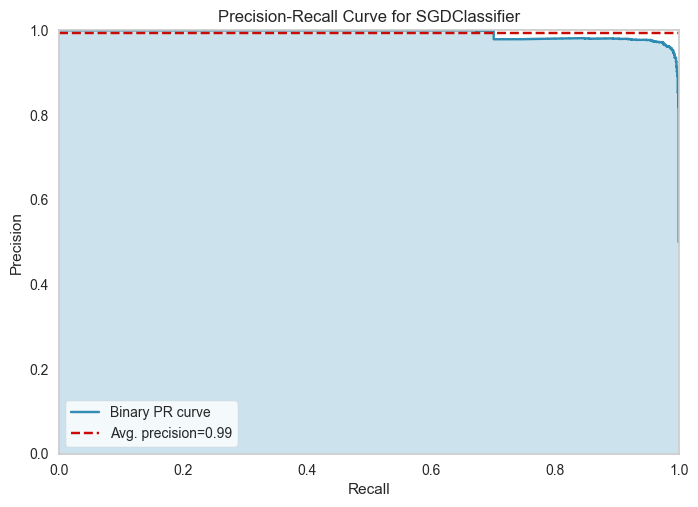

In [43]:
plot_model(tuned_model, plot = 'pr')

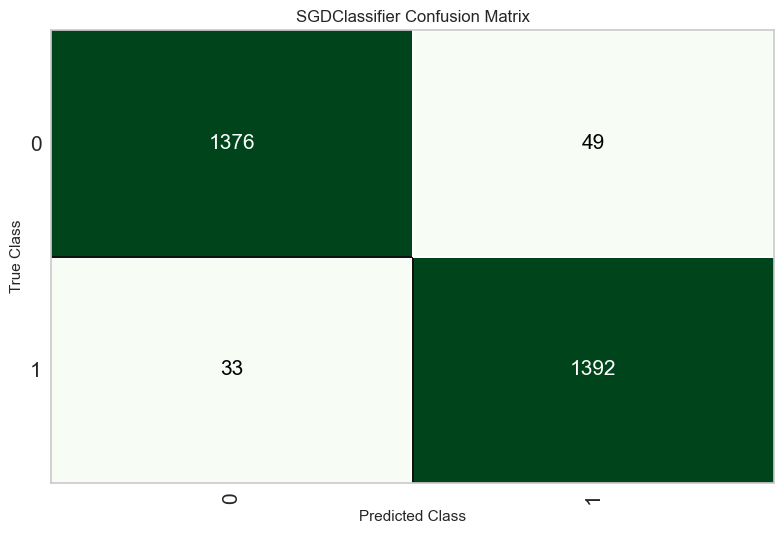

In [44]:
plot_model(tuned_model, plot='confusion_matrix')

## Evaluación y Métricas

In [45]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predicciones en Test

In [46]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9712,0.9712,0.9768,0.9660,0.9714,0.9425,0.9425


,00,000,0000,000000,01,0100,02,0200,03,035,...,zip,zone,zu,zur,½mï,½oï,½ï,œ3â,Email Type,prediction_label
8986,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
7443,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5260,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4839,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2082,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0.159,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1986,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.153,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5749,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
7191,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Entrenamos el modelo sobre TODO el dataset de entrenamiento (incluyendo el holdout set). Sirve como paso final antes de hacer predicciones en datos nuevos reales o antes de guardar el modelo para producción.

In [47]:
final_model = finalize_model(tuned_model)

In [49]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\Sofia\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['00', '000', '0000', '000000',
                                             '01', '0100', '02', '0200', '03',
                                             '035', '04', '0400', '05', '06',
                                             '07', '08', '09', '10', '100',
                                             '1000', '101', '105', '10532',
                                             '10728', '10th', '11', '110',
                                             '113', '115', '119', ...],
                                    transformer=Simpl...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.4,
                               fit_intercept=False, l1_ratio=0.7300000001,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='l2', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [50]:
#final_model.named_steps["actual_estimator"]
final_model.named_steps["trained_model"]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.4, fit_intercept=False,
              l1_ratio=0.7300000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
save_model(final_model, './pkl/phishing_model_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Sofia\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['00', '000', '0000', '000000',
                                              '01', '0100', '02', '0200', '03',
                                              '035', '04', '0400', '05', '06',
                                              '07', '08', '09', '10', '100',
                                              '1000', '101', '105', '10532',
                                              '10728', '10th', '11', '110',
                                              '113', '115', '119', ...],
                                     transformer=Simpl...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.4,
                                fit_intercept=False, l1_ratio=0.7300000001,


In [52]:
final_model = load_model('./pkl/phishing_model_final')

Transformation Pipeline and Model Successfully Loaded


### Validación

In [ ]:
# Vectorizar con el mismo vectorizer
X_unseen = vectorizer.transform(data_unseen['Cleaned'])
X_unseen_df = pd.DataFrame(X_unseen.toarray(), columns=vectorizer.get_feature_names_out())

# Usar PyCaret para predecir
unseen_predictions = predict_model(final_model, data=X_unseen_df)
unseen_predictions.head()

,00,000,0000,000000,01,0100,02,0200,03,035,...,zero,zip,zone,zu,zur,½mï,½oï,½ï,œ3â,prediction_label
0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.073,0.0,0.000,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.000,0.0,0.000,0.0,0.267,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.000,0.0,0.058,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [57]:
y_true = data_unseen['Email Type']
y_pred = unseen_predictions['prediction_label']

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Recall:", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


Accuracy: 0.96
Precision: 0.960265112704918
Recall: 0.96
F1 Score: 0.9599942391704406
Confusion Matrix:
 [[237  13]
 [  7 243]]
